# Lab03_523H0164

# Exercises

## Import libraries and useful function

In [125]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(image, title="Image", student_id="523H0164"):
    img_to_show = image.copy()

    # auto adjust fontscale
    font_scale = max(image.shape[1] / 500, 0.5)
    thickness = max(int(font_scale * 2), 2)
    margin = int(image.shape[1] * 0.015)
    position = (margin, image.shape[0] - margin)
    font = cv2.FONT_HERSHEY_SIMPLEX
    roi_y_start = image.shape[0] - int(image.shape[0] * 0.1)
    roi_x_end = int(image.shape[1] * 0.25)
    corner_roi = image[roi_y_start:, :roi_x_end]

    # auto adjust the color
    if len(corner_roi.shape) == 3 and corner_roi.shape[2] == 3:
        gray_roi = cv2.cvtColor(corner_roi, cv2.COLOR_BGR2GRAY)
        mean_intensity = np.mean(gray_roi)
    else:
        mean_intensity = np.mean(corner_roi)

    text_color_bgr = (0, 0, 0) if mean_intensity > 127 else (255, 255, 255)

    # put text
    cv2.putText(img_to_show, student_id, position, font, font_scale, text_color_bgr, thickness)

    if len(img_to_show.shape) == 3 and img_to_show.shape[2] == 3:
        img_to_display = cv2.cvtColor(img_to_show, cv2.COLOR_BGR2RGB)
        plt.imshow(img_to_display)
    else:
        plt.imshow(img_to_show, cmap='gray')

    plt.title(title)
    plt.axis('off')
    plt.show()

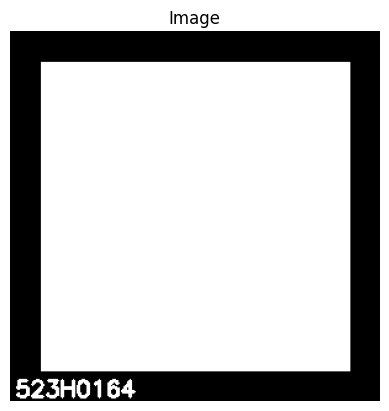

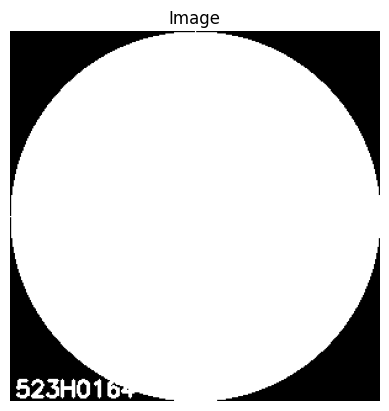

In [126]:
# creating a rectangle
rectangle = np.zeros((300, 300), dtype="uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
display_image(rectangle)

# creating a circle
circle = np.zeros((300, 300), dtype="uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)
display_image(circle)

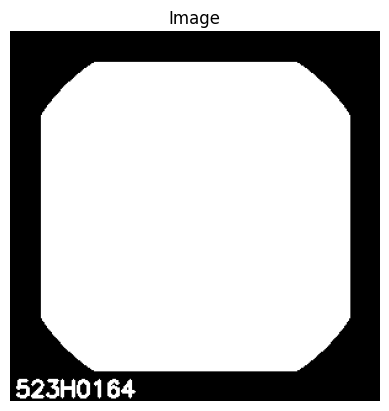

In [127]:
test_bitwiseAnd = cv2.bitwise_and(rectangle,circle)
display_image(test_bitwiseAnd)

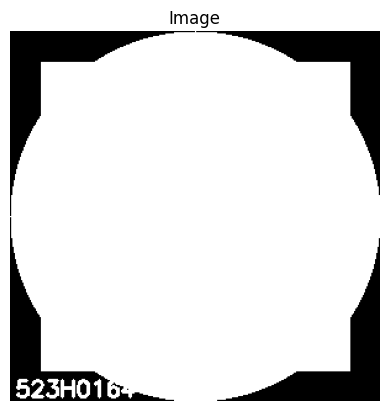

In [128]:
test_bitwiseOr = cv2.bitwise_or(rectangle,circle)
display_image(test_bitwiseOr)

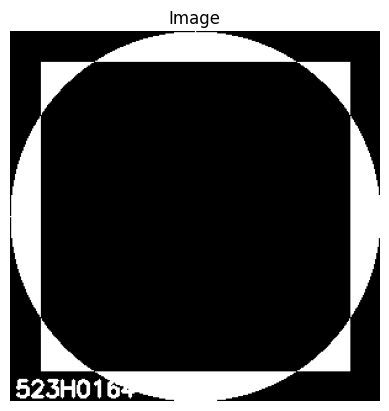

In [129]:
# only care with the differences
test_bitwiseXor = cv2.bitwise_xor(rectangle,circle)
display_image(test_bitwiseXor)

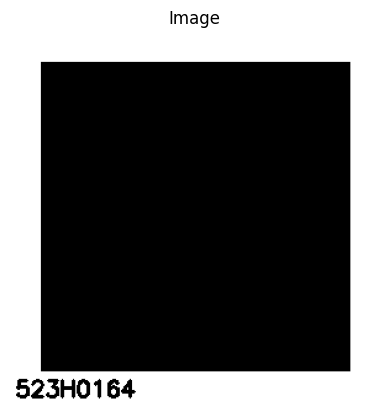

In [130]:
test_bitwiseNot = cv2.bitwise_not(rectangle, circle)

display_image(test_bitwiseNot)

### Exercise 1:
Masking image

Extracting the faces from the input image using a circular mask.

Output is 3 of face images extracted from the input image.

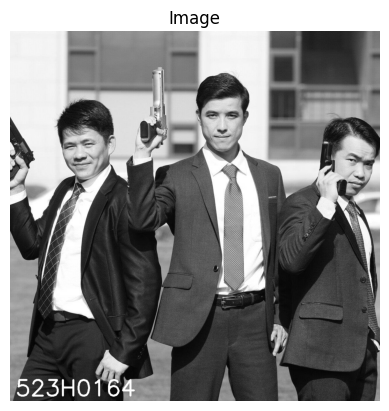

In [131]:
img = cv2.imread('exercise_1.png')
display_image(img)

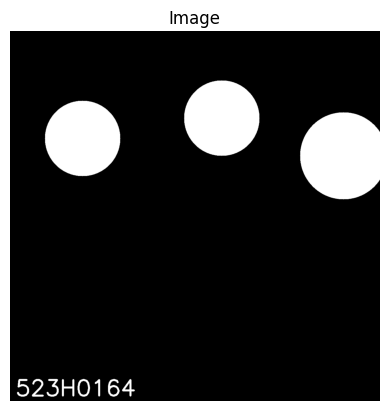

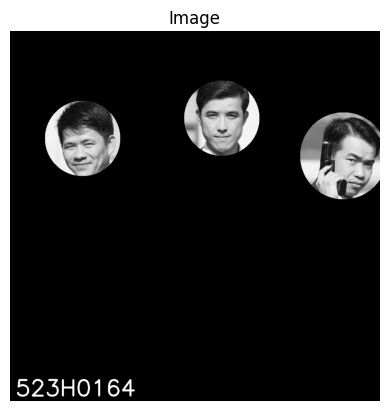

In [132]:
mask = np.zeros(img.shape[:2], dtype='uint8')

w, h, _ = img.shape

mask = cv2.circle(mask, (250, 370), 130, 255,-1)
mask = cv2.circle(mask, (730, 300), 130, 255,-1)
mask = cv2.circle(mask, (1150, 430), 150, 255,-1)
display_image(mask)

masked = cv2.bitwise_and(img, img ,mask=mask)

display_image(masked)


### Exercise 2:
Blend the following 2 images to create a new image


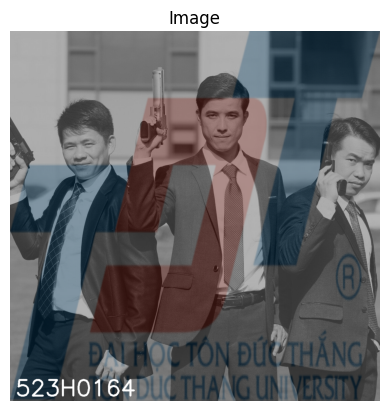

In [133]:
img_tdtu = cv2.imread("exercise2.png")

# resize the image
img_tdtu = cv2.resize(img_tdtu, img.shape[1::-1])

dst = cv2.addWeighted(img, 0.5, img_tdtu, 0.2, 0)
display_image(dst)

### Exercise 3:
Image thresholding

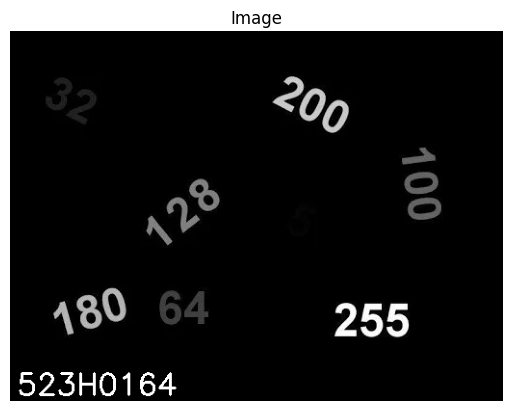

In [134]:
img_ex3 = cv2.imread("exercise3.png")
display_image(img_ex3)

#### Exercise 3.1:

a)

Convert the image into 02 binary images:
- 1st output :  numbers greater than or equals to 180 are in black

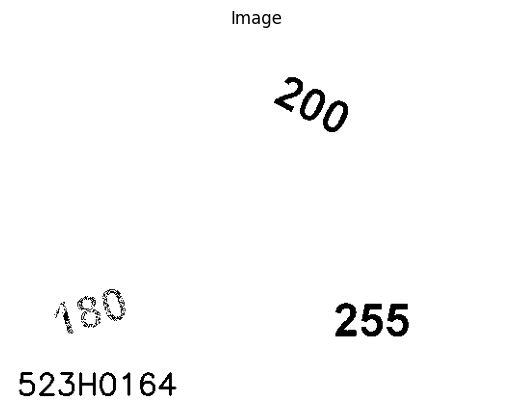

In [135]:
th, dst = cv2.threshold(img_ex3, 179, 255, cv2.THRESH_BINARY_INV)

display_image(dst)

#### Exercise 3.1:

b)

- 2nd output:  numbers less than 180 are in white

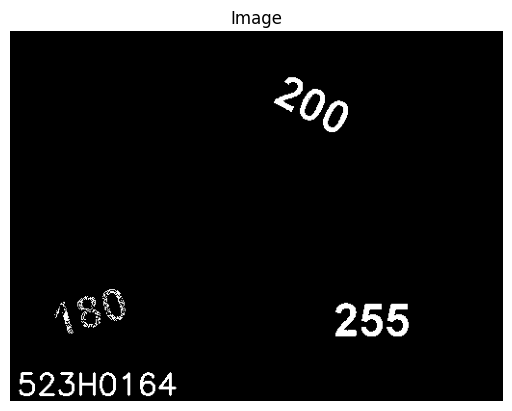

In [136]:
th, dst = cv2.threshold(img_ex3, 179, 255, cv2.THRESH_BINARY)
display_image(dst)

#### Exercise 3.2:

Extract each number in the input image as in separated images.

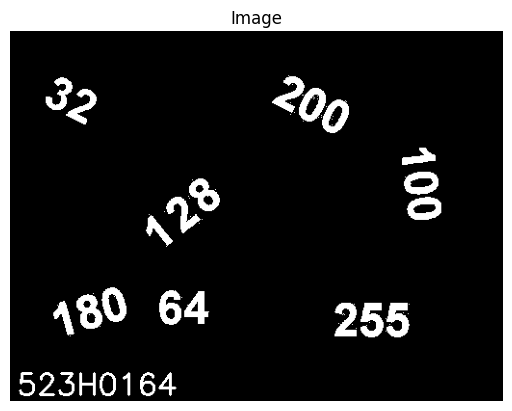

In [137]:

th, dst = cv2.threshold(img_ex3, 15, 255, cv2.THRESH_BINARY)
display_image(dst)

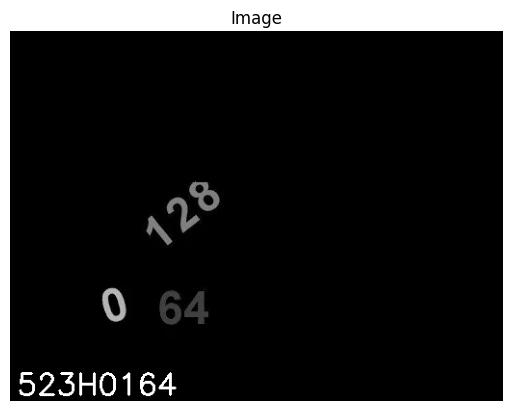

In [138]:
# using contour detection to find seperate and extract the number to each img


#### Homework
Create a video from your webcam by inserting the TDT logo to images streaming from your webcam.